# **Project 4 Report**

Nick Alvarez

CS458

# **P4-1. Hierarchical Clustering Dendogram**

**(a) Randomly generate the following data points**

**(b) Use sklearn.cluster.AgglomerativeClustering to cluster the points generated in (a). Plot your Dendrogram using different linkage{"ward", "complete", "average", "single"}.**

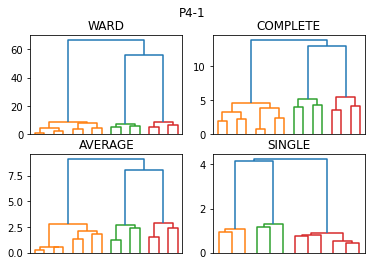

In [2]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

cluster_types = ["ward", "complete", "average", "single"]

# (a) Generate data points
np.random.seed(0)
x1 = np.random.randn(50,2)+[2,2]
x2 = np.random.randn(50,2)+[6,10]
x3 = np.random.randn(50,2)+[10,2]
x = np.concatenate((x1,x2,x3))

# (b) Cluster and plot points
fig, axs = plt.subplots(nrows=2, ncols=2, )

def createDendogram(model):
  counts = np.zeros(model.children_.shape[0])
  n_samples = len(model.labels_)
  for i, m in enumerate(model.children_):
    current_count = 0
    for child_idx in m:
      if child_idx < n_samples:
        current_count += 1  # leaf node
      else:
        current_count += counts[child_idx - n_samples]
    counts[i] = current_count

  return np.column_stack([model.children_, model.distances_, counts]).astype(float)


def plotClusters():
  clusterIndex = 0
  for row in range(0,2):
    for col in range(0,2):
      _cluster = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage=cluster_types[clusterIndex]).fit(x)
      linkage_matrix = createDendogram(_cluster)
      dendrogram(linkage_matrix, ax=axs[row, col], truncate_mode="level", p=3, no_labels=True)
      plt.title(cluster_types[clusterIndex])
      axs[row, col].set_title(cluster_types[clusterIndex].upper())
      clusterIndex += 1

plotClusters()
fig.suptitle("P4-1")
plt.show()

# **P4-2. Clustering structured dataset**

**(a) Generate a swiss roll dataset**

**(b) Use sklearn.cluster.AgglomerativeClustering to cluster the points generated in (a). Plot the clustered data in a 3D figure and use different colors for different clusters in your figure.**

**(c) Use sklearn.cluster.DBSCAN to cluster the points generated in (a). Plot the clustered data in a 3D figure and use different colors different clusters in your figure. Discuss and compare the results of DBSCAN with the results in (b).**

/var/folders/l2/jkjkc23n3nb1vvvxh548lc4wc_6_69/T/ipykernel_6037/242771987.py:18: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = ax3d.Axes3D(fig)
/var/folders/l2/jkjkc23n3nb1vvvxh548lc4wc_6_69/T/ipykernel_6037/242771987.py:28: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax2 = ax3d.Axes3D(fig2)


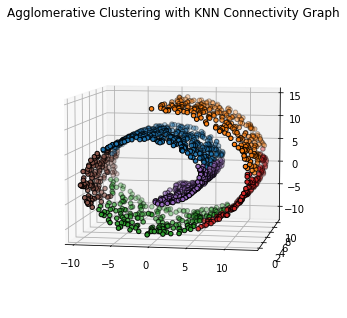

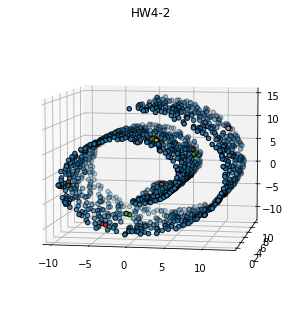

In [3]:
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.neighbors import kneighbors_graph
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as ax3d

# (a) generate swiss roll dataset
n_samples = 1500
noise = 0.05
x, _ = datasets.make_swiss_roll(n_samples, noise=noise)
x[:, 1] *= .5

# (b) Agglomerative Clustering
connectivity = kneighbors_graph(x, n_neighbors=10, include_self=False)
_ag_cluster = AgglomerativeClustering(n_clusters=6, connectivity=connectivity, linkage='ward').fit(x)
fig = plt.figure()
ax = ax3d.Axes3D(fig)
ax.view_init(7, -80)
ag_labels = _ag_cluster.labels_
for l in np.unique(ag_labels):
  ax.scatter(x[ag_labels==l, 0], x[ag_labels==l, 1], x[ag_labels==l,2], edgecolor='k')
ax.set_title("Agglomerative Clustering with KNN Connectivity Graph")

# (c) DBSCAN
_db_cluster = DBSCAN().fit(x)
fig2 = plt.figure()
ax2 = ax3d.Axes3D(fig2)
ax2.view_init(7, -80)
db_labels = _db_cluster.labels_
for l in np.unique(db_labels):
  ax2.scatter(x[db_labels==l, 0], x[db_labels==l, 1], x[db_labels==l,2], edgecolor='k')
ax2.set_title("DBSCAN Clustering")

plt.title("HW4-2")
plt.show()

The labels on this graph did not print as expected, BUT it is clear to see that DBSCAN is severely unfit for this clustering task. Agglomerative clustering produced clear groups, while DBSCAN looks like it could not decide what to do and made almost everything in one cluster.

# **P4-3. Clustering the handwritten digits data**

**(a) Use the following methods to cluster the data:**
- **K-Means (sklearn.cluster.KMeans)**
- **DBSCAN (sklearn.cluster.DBSCAN)**

**Optimize the parameters of these methods.**

**(b) Evaluate these methods based on the labels of the data and discuss which method gives you the best results in terms of accuracy.**

In [1]:
from sklearn import datasets, metrics
from sklearn.cluster import DBSCAN, KMeans
from sklearn.decomposition import PCA

x1,y = datasets.load_digits(return_X_y=True)
p = PCA(2)
p.fit(x1)
x = p.transform(x1)
print(f"Dimensionality reduced from {x1.shape[1]} to {x.shape[1]}")

# Cluster the data
_kmeans = [
  ("km_10cluster_.00001", KMeans(n_clusters=10, tol=1e-5)),
  ("km_12cluster_.1", KMeans(n_clusters=12, tol=1e-1)),
  ("km_10cluster_.01", KMeans(n_clusters=10, tol=1e-2)),
  ("km_9cluster_.0001", KMeans(n_clusters=9, tol=1e-4))
]

_dbscan = [
  ("db_1sample_1.1", DBSCAN(min_samples=1, eps=1.1)),
  ("db_1sample_1.2", DBSCAN(min_samples=1, eps=1.2)),
  ("db_1sample_1.3", DBSCAN(min_samples=1, eps=1.3))
]

def helper_dbTuning():
  for i in range(7, 21): #eps
    i10 = i/10.0
    tempTuple = [(i10, DBSCAN(min_samples=2, eps=i10))]
    runModel(tempTuple)

def helper_kMeansTuning():
  for i in range(2, 13): #n_clusters
    for j in [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]: #tolerance
      tempTuple = [(f"s{i} tol{j}", KMeans(n_clusters=i, tol=j))]
      runModel(tempTuple)

def runModel(m):
  for name, est in m:
    est.fit_predict(x)
    score = metrics.adjusted_rand_score(y, est.labels_)
    print(f"{name}: \t{score}")

print("Random Index Adjusted for Chance\n(closer to 1.0 is better)\n")
#helper_kMeansTuning()
#helper_dbTuning()
runModel(_kmeans)
print()
runModel(_dbscan)

Dimensionality reduced from 64 to 2
Random Index Adjusted for Chance
(closer to 1.0 is better)

km_10cluster_.00001: 	0.39349376957769955
km_12cluster_.1: 	0.35245664156277345
km_10cluster_.01: 	0.3624832931885294
km_9cluster_.0001: 	0.39005438627508526

db_1sample_1.1: 	0.18186315072510098
db_1sample_1.2: 	0.21572918235754845
db_1sample_1.3: 	0.1938344188410019


Hyperparameter tuning was made easy with the use of my helper functions. With their output (not shown), I selected the top performers and used them as the general runs. For a while, I could not get DBSCAN to produce anything useful, but reducing the dimensionality of the data greatly helped me.
KMeans does better when the data is NOT reduced, but I wanted an even comparison between the two.